In [ ]:
print("Data Analysis, Visualization and Model Building for CapStone Project")

Data Analysis, Visualization and Model Building for CapStone Project


In [ ]:
#Mounting Google Drive to Colab:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/CapStone_Project(Team-No:71)/Dataset

/content/gdrive/MyDrive/CapStone_Project(Team-No:71)/Dataset


In [ ]:
import pandas as pd
import numpy as np
db=pd.read_csv("output_table.csv")

In [ ]:
#Basic Analysis
names=db["Name"].unique()
names.sort()
print("Students:\n",(names))

Students:
 ['Akhil' 'Akshaya' 'Atharva' 'Bhavan']


In [ ]:
classes_attended=[]
for i in names:
  classes_attended.append(db['Name'].str.count(str(i)).sum())
print(classes_attended)

[10, 16, 9, 14]


In [ ]:
total_classes=db[['Day','Period_No']]
total_classes=total_classes.drop_duplicates()
print("Total Number of Classes: ",len(total_classes))

Total Number of Classes:  16


In [ ]:
percentage_attended=[]
for i in range(len(classes_attended)):
  percentage_attended.append(classes_attended[i]*100/len(total_classes))
print(percentage_attended)

[62.5, 100.0, 56.25, 87.5]


In [ ]:
attendance=dict(zip(names,percentage_attended))
attendance=dict(sorted(attendance.items(), key=lambda x: x[1], reverse=True))
print("Attendance Records for Students:")
print("{:<30} {:<30}".format('STUDENT NAME', 'ATTENDANCE %'))
for key, value in attendance.items():
  print("{:<30} {:<30}".format(key, value))

Attendance Records for Students:
STUDENT NAME                   ATTENDANCE %                  
Akshaya                        100.0                         
Bhavan                         87.5                          
Akhil                          62.5                          
Atharva                        56.25                         


<BarContainer object of 4 artists>

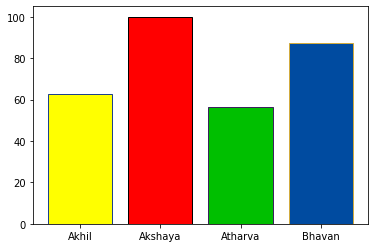

In [ ]:
cols=['#FFFF00','#FF0000','#00BF00','#004BA0']
edge=['#1D418C','#000000','#3A225D','#D1AB3E']
import matplotlib.pyplot as plt
% matplotlib inline
plt.bar(names,percentage_attended,color=cols,edgecolor=edge)

In [ ]:
marks=pd.read_csv("marks_table.csv")
final_marks=[]
for i in range(len(names)):
  final_marks.append(marks.loc[marks['Name']==names[i],'CGPA'].iloc[0])
print(final_marks)

[7.9, 8.63, 7.25, 8.13]


In [ ]:
#Exploratory Data Analysis
df=marks[['Name','CGPA']]
print("Shape of Data-Frame: ",df.shape)
print(df.info())

Shape of Data-Frame:  (4, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    4 non-null      object 
 1   CGPA    4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes
None


In [ ]:
print(df.describe())

           CGPA
count  4.000000
mean   7.977500
std    0.572793
min    7.250000
25%    7.737500
50%    8.015000
75%    8.255000
max    8.630000


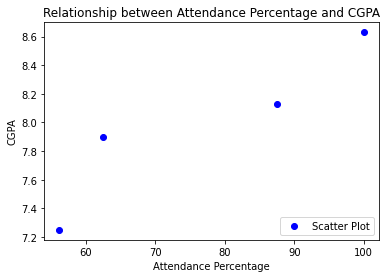

In [ ]:
X = (pd.DataFrame(percentage_attended)).values
y = df['CGPA'].values
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Attendance Percentage and CGPA')
plt.xlabel('Attendance Percentage')
plt.ylabel('CGPA')
plt.legend(loc=4)
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

(4, 1)
(4,)


In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(4, 1)
(4, 1)


In [ ]:
#Model Building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3, 1)
(3, 1)
(1, 1)
(1, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)  # perform linear regression
Y_pred = lm.predict(X)  # make predictions

In [ ]:
a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[0.02566107]]
Estimated model intercept, b: (array([6.01282443]),)


In [ ]:
lm.predict(X)[0:4]

array([[7.61664122],
       [8.5789313 ],
       [7.45625954],
       [8.25816794]])

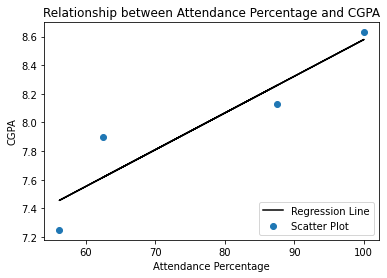

In [ ]:
plt.scatter(X, y, label='Scatter Plot')
plt.plot(X, Y_pred, color='black', label = 'Regression Line')
plt.title('Relationship between Attendance Percentage and CGPA')
plt.xlabel('Attendance Percentage')
plt.ylabel('CGPA')
plt.legend(loc=4)
plt.show()

In [ ]:
print("We can clearly observe that CGPA is directly proportional to Attendance Percentage.\nHence, higher attendance shows there is a chance of scoring higer CGPA.")

We can clearly observe that CGPA is directly proportional to Attendance Percentage.
Hence, higher attendance shows there is a chance of scoring higer CGPA.


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 0.1883


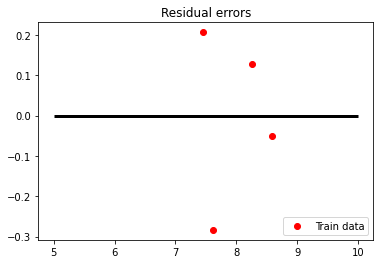

In [ ]:
plt.scatter(lm.predict(X), lm.predict(X) - y, color = 'red', label = 'Train data')
plt.hlines(xmin = 5, xmax = 10, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [ ]:
print("Accuracy: {:.4f}".format(lm.score(X,y)))

Accuracy: 0.8559
